<a href="https://colab.research.google.com/github/Harsh-Sagar/Machine-learning/blob/main/BuildingShapeEnergyAnalysisUsing(K_nn_regression_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

• **Objective:** *To build a k-NN regression model for the prediction of heating and cooing load requirements of the building using the available data.*

• **Data Description: **This data is about the **energy analysis of buildings using different building shapes** simulated in Ecotect software. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters

• Each row represents the attributes of a particular **building shape & characteristics.** This is a data of 768 samples, so the data contains 768 rows.

• There are 8 data attributes (columns) - X1 Relative Compactness, X2 Surface Area, X3 Wall Area, X4 Roof Area, X5 Overall Height, X6 Orientation, X7 Glazing Area, and X8 Glazing Area Distribution.

• y1 Heating Load and y2 Cooling Load are the target variables. Thus, this is a case of a **multiple response regression. **


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
data =pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


here we, have two target variables (y1,y2) for heating and cooling placed at the end of the dataframe.


In [ ]:
#print the shape of the data
data.shape
#It shows we have 10 column and 768 rows

(768, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
features = data.iloc[:,:-2]
prediction =data.iloc[:,-2:]

In [ ]:
features.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [ ]:
prediction.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


Featue Scaling

In [ ]:
#perform Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled= scaler.fit_transform(features)
features_scaled =pd.DataFrame(features_scaled , columns=features.columns)
features_scaled.head()


,X1,X2,X3,X4,X5,X6,X7,X8
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575


In [ ]:
from sklearn.model_selection import train_test_split
X_train,Xtest,y_train,y_test=train_test_split(features_scaled,prediction,test_size=0.2,random_state=42,shuffle=True)


Perform EDA(Exploratory Data Analysis)

In [ ]:
Train_data = pd.concat([X_train,y_train],axis='columns', names=[features.columns,prediction.columns])
Train_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
60,0.528182,-0.672602,0.000000,-0.655880,1.0,-1.341641,-1.009323,-1.169393,23.53,27.31
618,-1.174613,1.275625,0.561951,0.972512,-1.0,0.447214,1.244049,-0.524211,18.90,22.09
346,0.906580,-0.950920,-0.561951,-0.655880,1.0,0.447214,0.117363,-0.524211,29.27,29.90
294,1.284979,-1.229239,0.000000,-1.198678,1.0,0.447214,0.117363,-1.169393,32.84,32.71
231,-0.985413,0.997307,0.000000,0.972512,-1.0,1.341641,-1.009323,0.766154,11.43,14.83


Summary Statistics

In [ ]:
Train_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,-0.023547,0.024100,0.007322,0.019964,-0.016287,0.010197,0.007875,-0.008275,22.155033,24.410765
std,0.997305,1.001505,0.993988,0.996094,1.000683,0.991593,1.007649,1.001263,10.054280,9.476566
min,-1.363812,-1.785875,-1.685854,-1.470077,-1.000000,-1.341641,-1.760447,-1.814575,6.010000,10.900000
25%,-0.985413,-0.672602,-0.561951,-0.655880,-1.000000,-0.447214,-1.009323,-1.008097,12.977500,15.640000
50%,-0.228616,0.162352,0.000000,0.972512,-1.000000,0.447214,0.117363,0.120972,18.250000,21.500000
75%,0.528182,0.997307,0.561951,0.972512,1.000000,0.447214,1.244049,0.766154,31.545000,32.920000
max,2.041777,1.553943,2.247806,0.972512,1.000000,1.341641,1.244049,1.411336,43.100000,48.030000


Box Plots (for checking outlier in data)

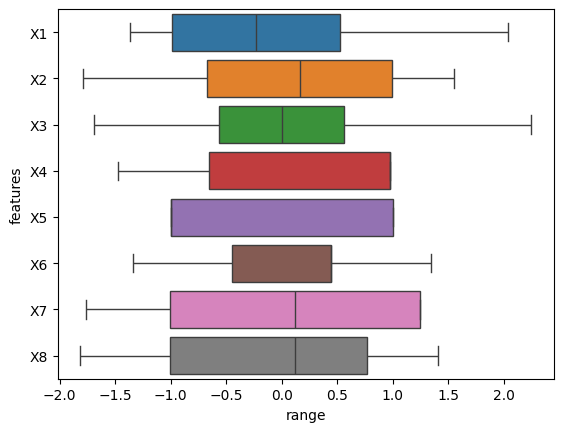

In [ ]:
#Seaborn is a data visualization library based on matplotlib
import seaborn as sns
sns.boxplot(data=X_train,orient="h").set(xlabel= 'range',ylabel='features')
plt.show()

Corelation Analysis b/w numerical features


In [ ]:
corr_mat=Train_data.corr(method='pearson')
corr_mat

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-0.991923,-0.211912,-0.870389,0.831108,-0.003444,0.009575,0.001160,0.629314,0.642148
X2,-0.991923,1.000000,0.204776,0.881746,-0.860752,0.005307,-0.012996,-0.001782,-0.664684,-0.679988
X3,-0.211912,0.204776,1.000000,-0.281167,0.267395,0.014898,-0.019823,-0.012122,0.439092,0.410905
X4,-0.870389,0.881746,-0.281167,1.000000,-0.972779,-0.001977,-0.003189,0.004095,-0.863294,-0.864714
X5,0.831108,-0.860752,0.267395,-0.972779,1.000000,-0.007185,0.003697,-0.007357,0.889154,0.894927
X6,-0.003444,0.005307,0.014898,-0.001977,-0.007185,1.000000,0.029363,0.010337,0.001772,0.008773
X7,0.009575,-0.012996,-0.019823,-0.003189,0.003697,0.029363,1.000000,0.206917,0.276184,0.212642
X8,0.001160,-0.001782,-0.012122,0.004095,-0.007357,0.010337,0.206917,1.000000,0.080206,0.041308
Y1,0.629314,-0.664684,0.439092,-0.863294,0.889154,0.001772,0.276184,0.080206,1.000000,0.976316
Y2,0.642148,-0.679988,0.410905,-0.864714,0.894927,0.008773,0.212642,0.041308,0.976316,1.000000


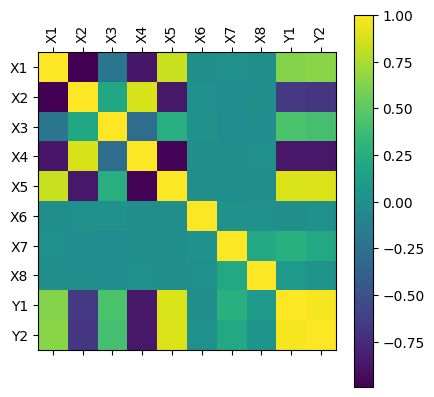

In [ ]:
#visualize the correlation matrix
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns,rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

Combining Target Variables

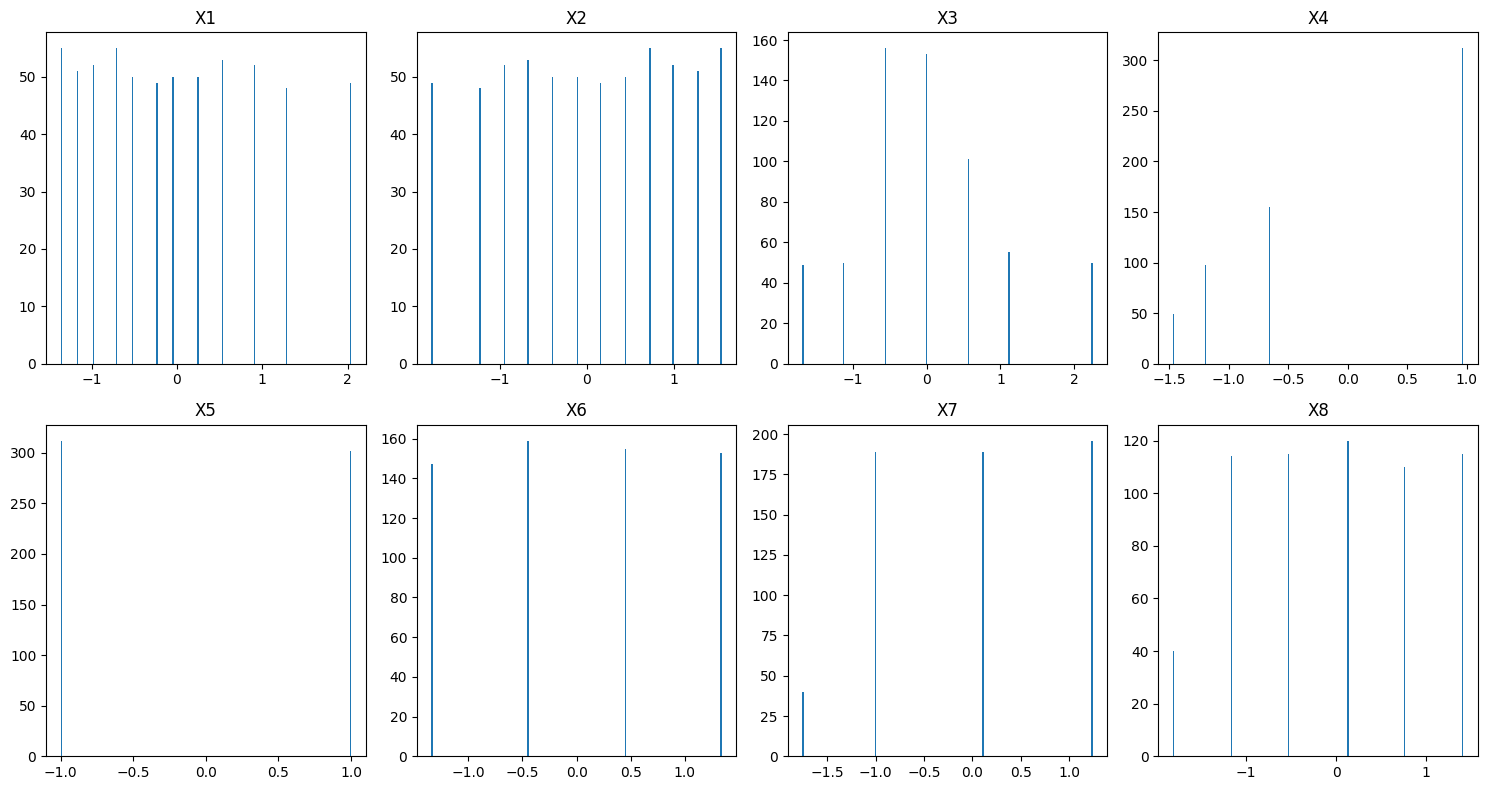

In [ ]:
#Explore the distributions of individual feature values
fig, axs =plt.subplots(2,4,figsize=(15,8))
axs=axs.flatten()

for i,col in enumerate(Train_data.columns[:-2]):
  axs[i].hist(Train_data[col],bins=200)
  axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the number of unique values in each column
unique_values =Train_data.nunique()
print(unique_values)

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    490
Y2    526
dtype: int64


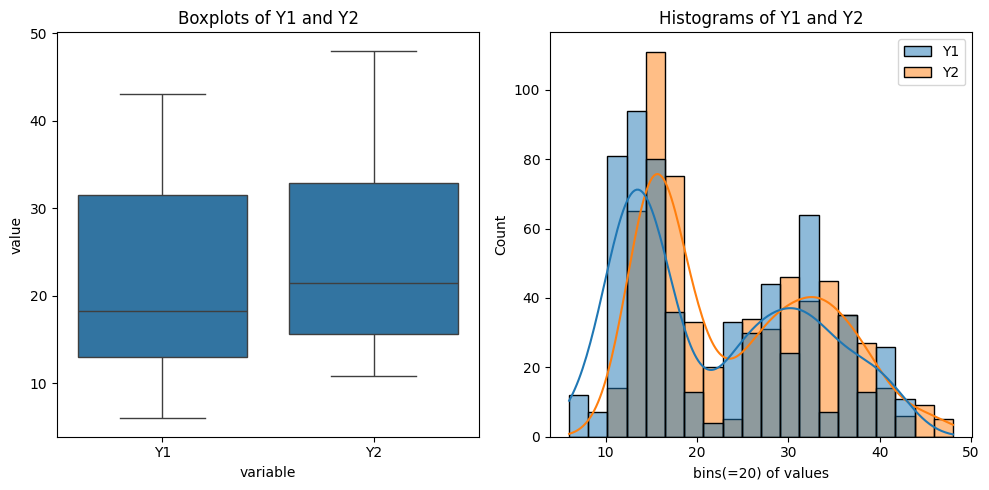

In [ ]:
#Calculate the distributions of individual target variable values
fig, axs= plt.subplots(1,2,figsize=(10,5))
axs=axs.flatten()

sns.boxplot(x="variable", y="value",data=pd.melt(Train_data[["Y1","Y2"]]),ax=axs[0])
axs[0].set_title("Boxplots of Y1 and Y2")

sns.histplot(data=Train_data[["Y1","Y2"]],ax=axs[1],bins=20,kde=True)
axs[1].set(xlabel='bins(=20) of values')
axs[1].set_title("Histograms of Y1 and Y2")

plt.tight_layout()
plt.show()

Model Building : Testing and Training

In [ ]:
#Import KNN regression class
from sklearn.neighbors import KNeighborsRegressor
model=knn=KNeighborsRegressor(n_neighbors=7) #k=7

model.fit(X_train,y_train) #Training the model on train data
y_pred_train=model.predict(X_train) #make prediction on the training set
y_pred_test=model.predict(Xtest) #make prediction on the testing set


Result and Interpretation

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
mse_train =mean_squared_error(y_train,y_pred_train)
mas_train =mean_absolute_error(y_train,y_pred_train)
r2_train=r2_score(y_train,y_pred_train)

print("Evaluation metrics: Train Data")
print("MSE: ",mse_train)
print("MAE: ",mas_train)
print("R2: ",r2_train)


Evaluation metrics: Train Data
MSE:  4.892044346207541
MAE:  1.4894741740344353
R2:  0.9481202515645063


In [ ]:
mse_test =mean_squared_error(y_test,y_pred_test)
mas_test =mean_absolute_error(y_test,y_pred_test)
r2_test=r2_score(y_test,y_pred_test)

print("Evaluation metrics: Test Data")
print("MSE: ",mse_test)
print("MAE: ",mas_test)
print("R2: ",r2_test)

Evaluation metrics: Test Data
MSE:  6.209619325735488
MAE:  1.6193172541743976
R2:  0.9362816216747056


Further improve (Feature Selection)
X6,X8 shows no correlation with target variables. so droping X6,X8

In [ ]:
#Drop X6,X8
X_train_selected =X_train.drop(['X6','X8'],axis=1,inplace=False)
X_test_selected =Xtest.drop(['X6','X8'],axis=1,inplace=False)

In [ ]:
#Import KNN regression class
from sklearn.neighbors import KNeighborsRegressor
model_selected = knn=KNeighborsRegressor(n_neighbors=7) #k=7

model_selected.fit(X_train_selected,y_train) #Training the model on train data
y_pred_train_selected= model_selected.predict(X_train_selected) #make prediction on the training set
y_pred_test_selected=  model_selected.predict(X_test_selected) #make prediction on the testing set


In [ ]:
#check the R2 score
r2_train_selected=r2_score(y_train,y_pred_train_selected)
r2_test_selected=r2_score(y_test,y_pred_test_selected)
print("R2 score for train data after feature selection: ",r2_train_selected)
print("R2 score for test data after feature selection: ",r2_test_selected)

R2 score for train data after feature selection:  0.9776411921335965
R2 score for test data after feature selection:  0.9762958196476678


the R2 score have shot up significantly.

Hyperparameter tuning : Findnig the best k

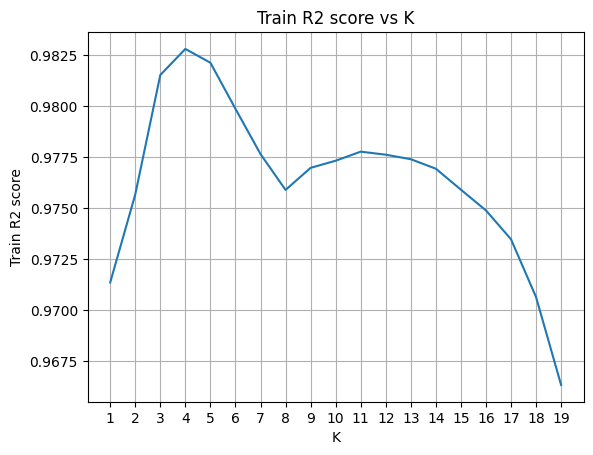

In [ ]:
#Hyperparameter tuning
k_values =list(range(1,20)) #k range b/w 1 to 19
model_best =KNeighborsRegressor()
r2_values,mse_values=[] ,[]
for k in k_values:
  model_best.set_params(n_neighbors=k)
  model_best.fit(X_train_selected,y_train)
  y_pred_current=model_best.predict(X_train_selected) # Use X_train_selected for prediction
  r2_current =r2_score(y_train,y_pred_current)
  mse_current =mean_squared_error(y_train,y_pred_current)
  r2_values.append(r2_current)
  mse_values.append(mse_current)

#Plot the variation of R2 for various values of K
plt.plot(k_values,r2_values)
plt.title("Train R2 score vs K")
plt.xlabel("K")
plt.ylabel("Train R2 score")
plt.xticks(k_values)
plt.grid()
plt.show()

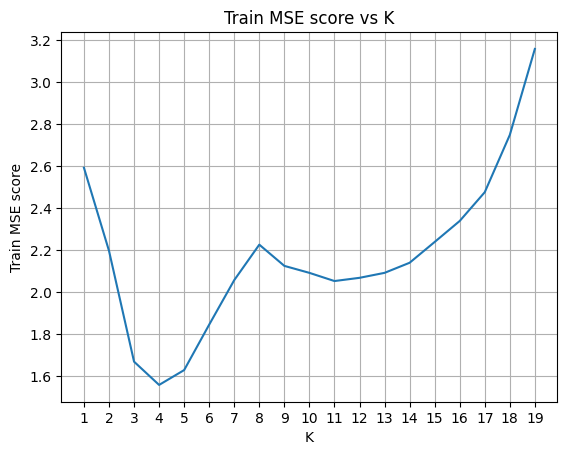

In [ ]:
#Plot the variation of MSE for various values of K
plt.plot(k_values,mse_values)
plt.title("Train MSE score vs K")
plt.xlabel("K")
plt.ylabel("Train MSE score")
plt.xticks(k_values)
plt.grid()
plt.show()

The MSE plot confirms that k=4 is the best choice

In [ ]:
'''Fit the KNN regression model with the best hyperparameteer K and evaluate its
 performance on the testing set'''

k_best=k_values[np.argmax(r2_values)]
model_best.set_params(n_neighbors=k_best)
model_best.fit(X_train_selected,y_train)
y_train_pred_best= model_best.predict(X_train_selected)
y_test_pred_best= model_best.predict(X_test_selected)
r2_best_train=r2_score(y_train,y_train_pred_best)
r2_best_test=r2_score(y_test,y_test_pred_best)

print("Best K: ",k_best)
print("R2 score for train data with best K: ",r2_best_train)
print("R2 score for test data with best K: ",r2_best_test)


Best K:  4
R2 score for train data with best K:  0.9827939003680013
R2 score for test data with best K:  0.9761765320385598


**Conclusion**

*We have buill a k-NN regression model that predicts the heating and cooing load requirements of the building with an R2 score of approx. 0.98 on train and 0.97 on 1est dala The best value of the number of clusters turns out to be four.*